# Ensemble classification test with unsmoothed data

In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import ols_functions as of

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.rcParams['figure.facecolor'] = 'white'

## import variables saved for ensemble regression
Once nice thing about trees is that they don't care about distributions and scaling, so we don't need to do extensive feature scaling here.

In [97]:
reload(of)
allX, allY = of.get_data_for_ensemble()

In [98]:
allX.fillna(value=0, inplace=True)

In [99]:
print allX.shape
print allY.shape

(763247, 109)
(763247,)


In [120]:
if "rank" in allX.columns:
    allX.drop('rank', axis=1, inplace=True)

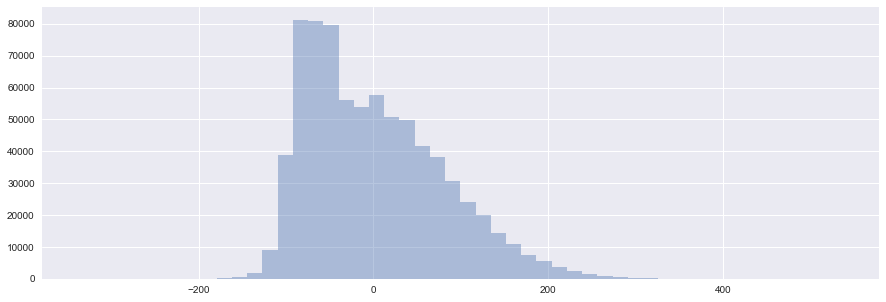

In [160]:
sns.distplot(allY.dropna(), kde=False)

## train/test/val data

In [121]:
with open('set_train.txt') as f:
    settrain = [t.strip() for t in f.readlines()]
with open('set_test.txt') as f:
    settest = [t.strip() for t in f.readlines()]
with open('set_val.txt') as f:
    setval = [t.strip() for t in f.readlines()]

In [122]:
df_train = allX.loc[settrain]
df_test = allX.loc[settest]

df_val = allX.loc[setval]

In [123]:
print df_train.shape
print df_val.shape
print df_test.shape

(340769, 108)
(108925, 108)
(146383, 108)


In [103]:
y_train = allY.loc[settrain]
y_val = allY.loc[setval]
y_test = allY.loc[settest]

In [104]:
print y_train.shape
print y_test.shape
print y_val.shape

(340769,)
(146383,)
(108925,)


In [124]:
for c in df_train.columns:
    print c

java
lowlevel
max_error_contest
max_error_practice
max_probability_contest
max_probability_practice
max_ratingdiff_contest
max_ratingdiff_practice
max_solvetime
max_timediff
max_wrong_contest
max_wrong_practice
mean_error_contest
mean_error_practice
mean_probability_contest
mean_probability_practice
mean_ratingdiff_contest
mean_ratingdiff_practice
mean_solvetime
mean_timediff
mean_wrong_contest
mean_wrong_practice
min_solvetime
min_timediff
n100
n200
n300
n400
n500
n_solved
n_unlikely01
n_unlikely02
oldrating
performance
python
smoothed_1months
smoothed_2months
smoothed_3months
smoothed_4months
smoothed_5months
std_error_contest
std_error_practice
std_probability_contest
std_probability_practice
std_ratingdiff_contest 
std_ratingdiff_practice
std_solvetime
std_timediff
std_wrong_contest
std_wrong_practice
tot_solvetime
total_contests
total_error_contest
total_error_practice
total_newtags
total_problems
total_wrong_contest
total_wrong_practice
unique_newtags
unique_tags_total
*special
2

## Export for gridsearch

In [140]:
out = dict(
    xtrain=df_train,
    ytrain=y_train,
    xval=df_val,
    yval=y_val,
    xtest=df_test,
    ytest=y_test,
)
import pickle
with open('ensemble_data.pickle', 'w') as f:
    pickle.dump(out, f)

## RF regressor

In [137]:
rf = RandomForestRegressor(n_estimators=100, random_state=12358, verbose=1, min_samples_split=3, n_jobs=-1)

In [138]:
model = rf.fit(df_train, y_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.5min


KeyboardInterrupt: 

In [ ]:
#class sklearn.model_selection.GridSearchCV(estimator,
#                                           param_grid,
#                                           scoring=None,
#                                           fit_params=None,
#                                           n_jobs=1,
#                                           iid=True,
#                                           refit=True,
#                                           cv=None,
#                                           verbose=0,
#                                           pre_dispatch='2*n_jobs',
#                                           error_score='raise',
#                                           return_train_score=True)

In [ ]:
test = model.decision_path(np.array(df_train_ok)[0,:])

In [131]:
print model.score(df_train, y_train)
print model.score(df_val, y_val)
print model.score(df_test, y_test)

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.1s finished


0.66733576938


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   10.5s finished


0.902098476175
0.497941044347


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.5s finished


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   11.9s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.8s finished


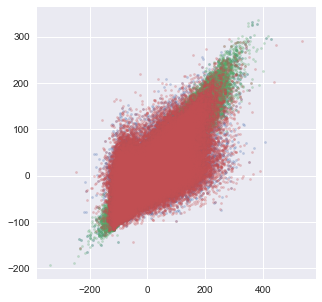

In [132]:
plt.scatter(y_val, rf.predict(df_val), s=5, alpha=.3)
plt.scatter(y_train, rf.predict(df_train), s=5, alpha=.3)
plt.scatter(y_test, rf.predict(df_test), s=5, alpha=.3)

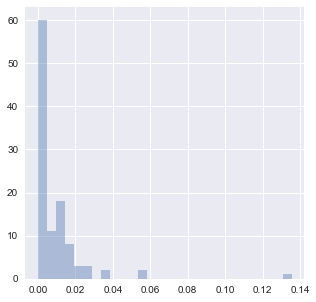

In [133]:
sns.distplot(model.feature_importances_, kde=False)

In [134]:
imp = pd.Series(model.feature_importances_)
imp.index = df_train.columns

In [135]:
imp.sort_values(ascending=False)

performance                  0.135512
n100                         0.055910
oldrating                    0.054287
mean_probability_contest     0.038034
max_ratingdiff_contest       0.035578
total_contests               0.028968
mean_wrong_contest           0.026380
rating_diff_mean             0.026127
std_solvetime                0.023590
smoothed_5months             0.021932
std_probability_contest      0.020568
max_probability_contest      0.017187
mean_ratingdiff_contest      0.017129
smoothed_4months             0.016653
smoothed_3months             0.016224
total_problems               0.016074
min_timediff                 0.015818
std_ratingdiff_contest       0.015197
max_timediff                 0.014674
mean_timediff                0.014502
mean_solvetime               0.013852
n_wrong_mean                 0.013660
std_timediff                 0.013634
smoothed_1months             0.013434
smoothed_2months             0.013176
rating_diff_std              0.013161
std_wrong_co

###  "local" landscape

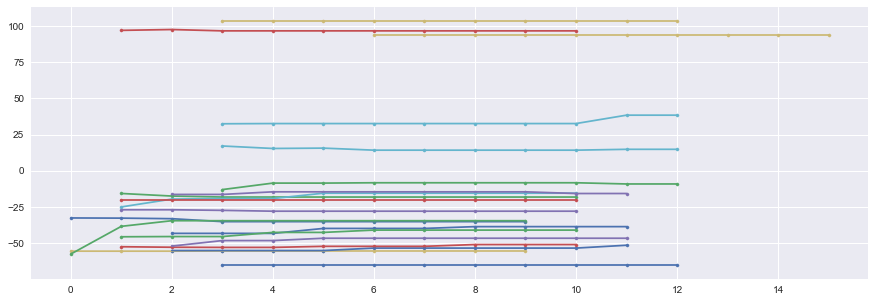

In [159]:
eps = 1
model.verbose = 0
model.n_jobs = -1
varidx = np.argwhere(df_test.columns == 'n100')[0]
for j in range(20):
    x = []
    y = []
    for i in range(0, 10):
        testin = np.array(df_test.iloc[j])
        testin = testin.reshape(1, -1)
        testin2 = testin.copy()
        testin2[0][varidx] += eps * i
        x.append(testin2[0][varidx])
        y.append(model.predict(testin2))

    plt.rcParams['figure.figsize'] = (15, 5)
    plt.plot(x, y)
    plt.scatter(x, y, s=10)

# playing around with test sets

In [ ]:
df_last = pd.read_csv('OLStrain_all_normalized_data_last.csv')

In [154]:
test = df_last.loc['chenmark', df_train.columns]

model.predict(test) * 532.75

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([-3.08058036])

In [176]:
model.score(df_val_ok, yval_val_ok)

0.87794472739190932

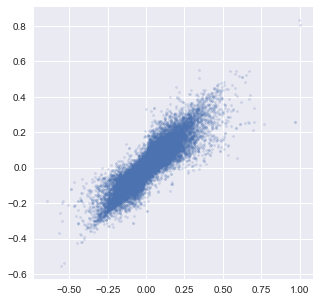

In [185]:
ypred = model.predict(df_test_ok)

plt.scatter(yval_test_ok, ypred, alpha=.2, s=5)

In [189]:
estimator = model
n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold

AttributeError: 'RandomForestRegressor' object has no attribute 'tree_'